# COMP47490 Assignment 1
#### Student No: 19396951

This dataset contains data for classifying a star as a pulsar or not. Features are based on
a number of values extracted from astronomical imaging.
Pulsar stars are a very rare type of Neutron star that produce radio emission detectable on
Earth and they are of considerable scientific interest as probes of space-time and states of
matter. Their emission spreads across the sky and produces a detectable pattern of
broadband radio emission. However in practice almost all detections are caused by radio
frequency interference and noise, making legitimate signals hard to find.
The main purpose of this problem is to build a simple classifier in order to predict wether a
detected signal comes from a pulsar star or from other sources such as noises,
interferences, etc. In other words, the goal in this assignment is to work with the data to
build and evaluate prediction models that capture the relationship between the descriptive
features and the target feature "target_class". 

#### Importing librarys needed

In [234]:
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np
# importing models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.metrics import RocCurveDisplay
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.dummy import DummyClassifier
import itertools

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# to make the plots display inline 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Task 1: Data Cleaning

In [2]:
# Reading from a csv file, into a data frame
# skipinitialspace = True, will remove any spaces infront of the values
df = pd.read_csv("pulsar_star_19396951.csv", skipinitialspace = True)
df_copy = df.copy()
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,36.250000,29.001347,4.645651,28.578862,16.281773,47.301407,3.403103,11.373581,1.0
1,126.390625,61.390939,-0.024068,-0.818730,4.213211,23.096038,7.416199,61.519381,0.0
2,109.703125,53.368758,0.019301,-0.322083,2.342809,14.887972,8.997162,104.482911,0.0
3,113.898438,43.096882,0.073892,0.661630,1.440635,14.288850,13.650962,206.590696,0.0
4,148.367188,47.334064,NaN,0.020042,21.770903,49.061947,2.294333,4.450490,0.0


In [3]:
#check for positive and negative cases of pulsar detections
df["target_class"].value_counts()

0.0    9093
1.0     907
Name: target_class, dtype: int64

Checking how many pulsar detection cases are and we can see there is an unbalanced numer of 0(90.93%) and 1(9.07%)

In [4]:
df.shape

(10000, 9)

There are 10000 pulsar candidates within this dataset. 
8 columns of descriptive data about each row/star and one column of categorical data

Key point:

- target_class = 1 implies positive for pulsar
- target_class = 0 implies false for pulsar



In [5]:
#checking data types for each column
df.dtypes

Mean of the integrated profile                  float64
Standard deviation of the integrated profile    float64
Excess kurtosis of the integrated profile       float64
Skewness of the integrated profile              float64
Mean of the DM-SNR curve                        float64
Standard deviation of the DM-SNR curve          float64
Excess kurtosis of the DM-SNR curve             float64
Skewness of the DM-SNR curve                    float64
target_class                                    float64
dtype: object

On examining the data types we see that `target_class` is set at `float64`, but this is wrong as there is only 2 possible outcomes for this feature. So I will make switch `target_class` from `float64` to `Category`.

In [6]:
#changing datatype from float to category
df['target_class'] = df['target_class'].astype('category')
df.dtypes

Mean of the integrated profile                   float64
Standard deviation of the integrated profile     float64
Excess kurtosis of the integrated profile        float64
Skewness of the integrated profile               float64
Mean of the DM-SNR curve                         float64
Standard deviation of the DM-SNR curve           float64
Excess kurtosis of the DM-SNR curve              float64
Skewness of the DM-SNR curve                     float64
target_class                                    category
dtype: object

### Checking for duplicates


In [7]:
# Check columns
dfT = df.T  # transpose dataframe and perform same check as done for rows
dfT[dfT.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


It appears that there are no duplicate rows

### Checking for Missing Values

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,10000.0,111.310377,25.587452,5.812500,101.224609,115.339844,127.322266,185.257812
Standard deviation of the integrated profile,10000.0,46.601926,6.839308,24.772042,42.437743,46.941564,51.010963,91.808628
Excess kurtosis of the integrated profile,8624.0,0.471825,1.058708,-1.738021,0.022827,0.222431,0.467792,8.069522
Skewness of the integrated profile,10000.0,1.740240,6.155850,-1.791886,-0.188070,0.202834,0.909757,68.101622
Mean of the DM-SNR curve,10000.0,12.772327,29.926642,0.213211,1.895485,2.783027,5.388169,222.421405
Standard deviation of the DM-SNR curve,9064.0,26.250386,19.590656,7.370432,14.367969,18.330134,28.098784,109.655345
Excess kurtosis of the DM-SNR curve,10000.0,8.356569,4.548959,-3.139270,5.817851,8.487764,10.764497,34.539844
Skewness of the DM-SNR curve,9514.0,106.163050,107.525167,-1.949109,35.497241,83.430777,140.773547,1191.000837


From above using the function `describe().T` we can see that there are missing values in 3/9 features.

- Excess kurtosis of the integrated profile: 8624.0, So we are missing 1375 values.

- Standard deviation of the DM-SNR curve: 9064.0, So we are missing 936 values.

- Skewness of the DM-SNR curve: 9514.0, So we are missing 486 values.

In [9]:
#% of missing data for all features
100 * (df.isnull().sum()/df.shape[0])

Mean of the integrated profile                   0.00
Standard deviation of the integrated profile     0.00
Excess kurtosis of the integrated profile       13.76
Skewness of the integrated profile               0.00
Mean of the DM-SNR curve                         0.00
Standard deviation of the DM-SNR curve           9.36
Excess kurtosis of the DM-SNR curve              0.00
Skewness of the DM-SNR curve                     4.86
target_class                                     0.00
dtype: float64

### Checking the cardinality of the columns

In [10]:
# gets the number of unique values for all features
df.nunique()

Mean of the integrated profile                   6319
Standard deviation of the integrated profile     9989
Excess kurtosis of the integrated profile        8624
Skewness of the integrated profile              10000
Mean of the DM-SNR curve                         6233
Standard deviation of the DM-SNR curve           9063
Excess kurtosis of the DM-SNR curve              9999
Skewness of the DM-SNR curve                     9513
target_class                                        2
dtype: int64

All columns have cardinality > 1, hence there are no constant columns in the dataset. 

### Checking for Outliers


Outliers are unusually high/low values compared to the other observations in the data.     
Visual approach make it easier to identify the distribution of values and in spotting unusual obserations in the data.

In [11]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)

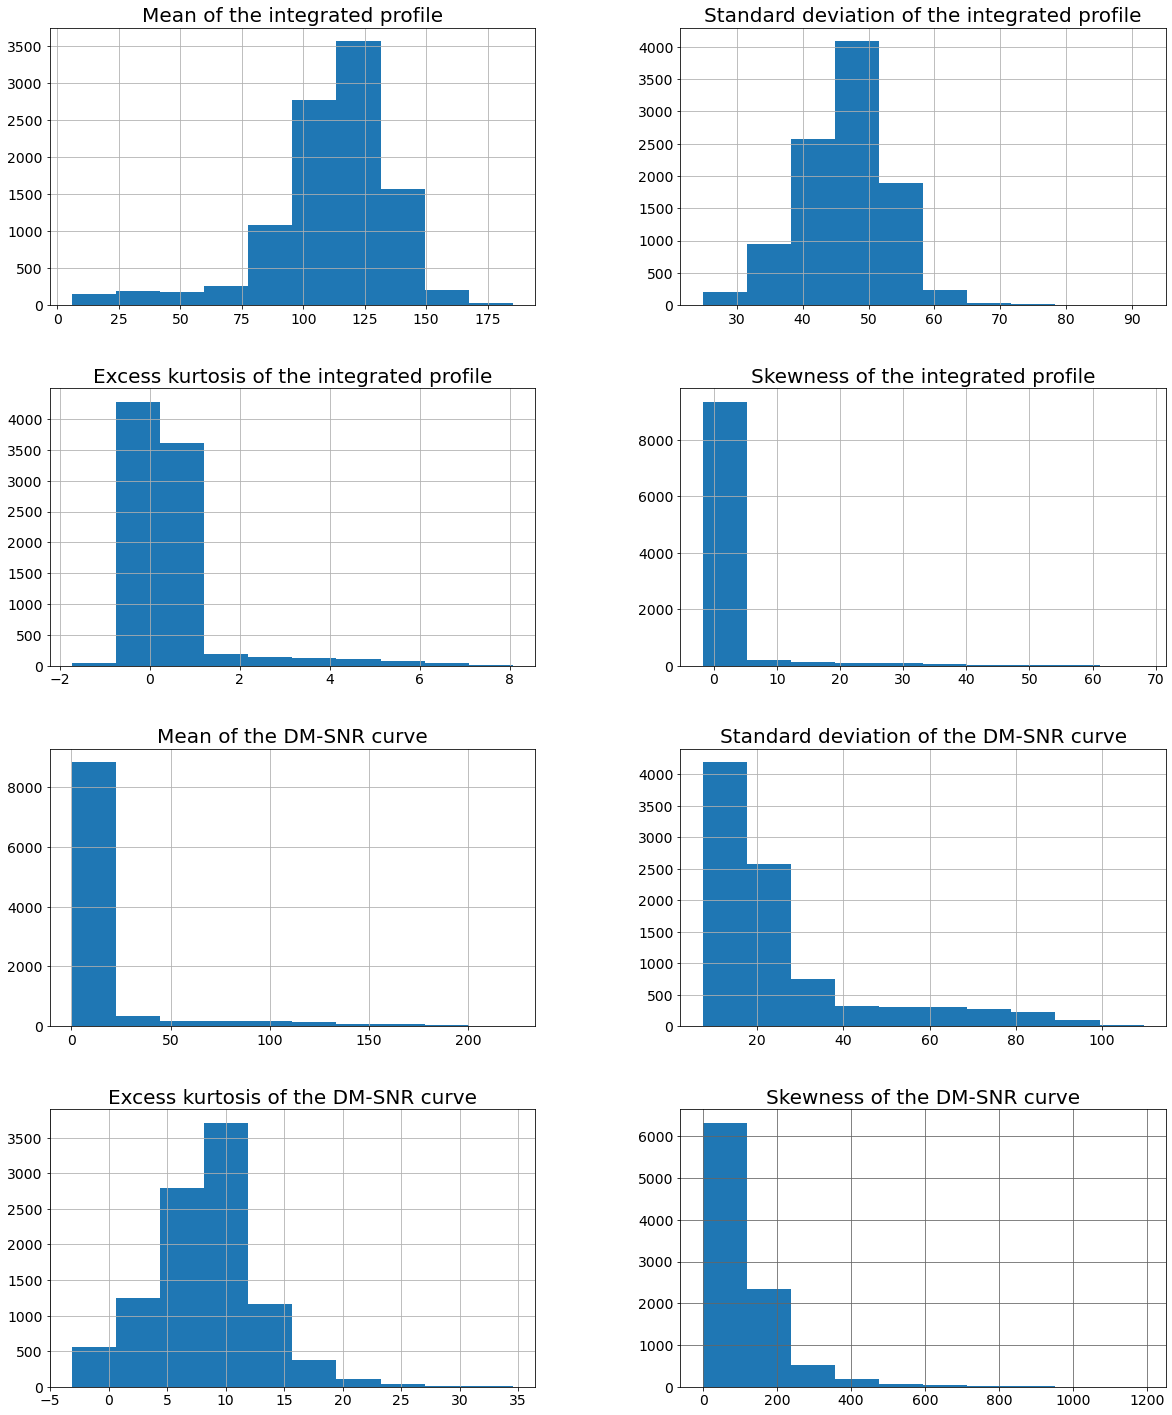

In [12]:
# add semicolon at the end of the code to avoid displaying matplotlib objects
# df.hist plots the distribution of the numerical features 
df.hist(figsize=(20, 25), layout=(4,2));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

From the histograms we can quickly see potential invalid data such as large numbers. Another way to see outliers and potential errors is to use boxplots for each feature.

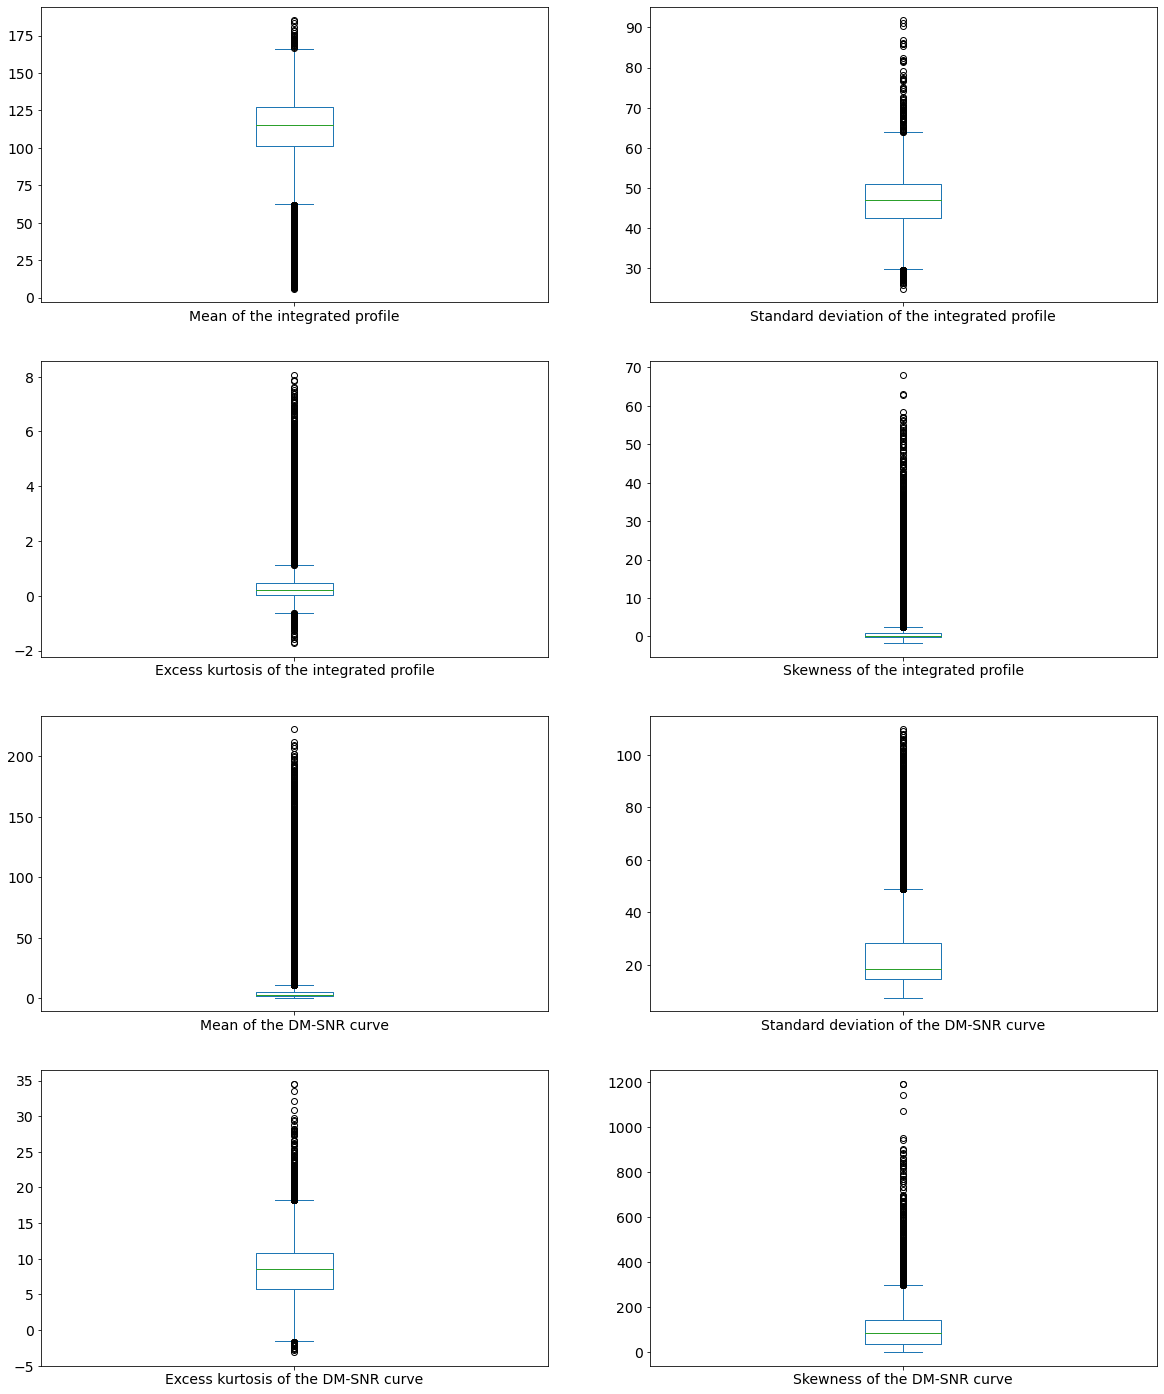

In [13]:
numeric_columns = df.select_dtypes(['float64']).columns
df[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25), layout=(4, 2), sharex=False, sharey=False);

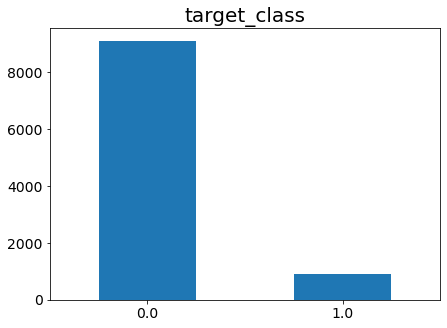

In [14]:
category_columns = df.select_dtypes(['category']).columns

for column in category_columns:
    df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(7,5), rot=0)
    plt.show()

As we can see from the boxplots there are very large amounts of outliers in all the `Numerical Features` especially in `Mean of DM-SNR Curve` and `Skewerness of the Integrated Profile`

### Summary of the issues in data and potential handling strategies


| Feature | Data type | Issue | Mitigation |
| --- | --- | --- | --- |
| `Mean of the integrated profile` | `float64` | many outliers (noise). | Use IQR to find and replace outliers with upper limit or lower limit | 
| `Standard deviation of the integrated profile` | `float64` | many outliers (noise). | Use IQR to find and replace outliers with upper limit or lower limit |
| `Excess kurtosis of the integrated profile` | `float64` | Missing 13.76% values and many outliers |  Use IQR to find and replace outliers with upper limit or lower limit and drop rows with missing values|
| `Skewness of the integrated profile'` | `float64` | Many outliers (noise). | Use IQR to find and replace outliers with upper limit or lower limit|  
| `Mean of the DM-SNR curve` | `float64` | many outliers (noise) | Use IQR to find and replace outliers with upper limit or lower limit |
| `Standard deviation of the DM-SNR curve` | `float64` | 9.36% missing values and many outliers | Use IQR to find and replace outliers with upper limit or lower limit and drop rows with missing values |
| `Excess kurtosis of the DM-SNR curve` | `float64` | many outliers (noise) | Use IQR to find and replace outliers with upper limit or lower limit |
| `Skewness of the DM-SNR curve` | `float64` | Many outliers (noise) and 4.86% missing values | Use IQR to find and replace outliers with upper limit or lower limit and fill in missing values|
| `target_class` | `category` | Unbalanced number of 0 and 1 (proportion of 0: 90.93%). | Investigate further and decide how to make it more balanced if possible |

#### Dealing with `Mean of the integrated profile`

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

In [15]:
#function makes the list of outliers 

#checking for the outliers using the upper limit and lower limit
#if outlier is found append to outlier list
def outlier(data, up_lim, low_lim):
    outlier = []
    for x in data:
        if ((x > up_lim) or (x < low_lim)):
             outlier.append(x)
    return outlier

In [16]:
#created a function which prints the IQR when the column is inputted in the function
def IQR(data):
    #First quartile (Q1)
    Q1 = data.quantile(0.25)
    #third quartile (Q3)
    Q3 = data.quantile(0.75)
    #formula to get Interquantile range
    IQR = Q3 - Q1
    #formula for upper and lower limits
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    #printing out all the data 
    print('Q1 25 percentile of the given data is,',Q1)
    print('Q3 75 percentile of the given data is,',Q3)
    print('low_lim is', low_lim)
    print('up_lim is', up_lim)
    #using the boxplot to see the outlier
    return sns.boxplot(data)

Q1 25 percentile of the given data is, 101.224609375
Q3 75 percentile of the given data is, 127.322265625
low_lim is 62.078125
up_lim is 166.46875


<AxesSubplot:xlabel='Mean of the integrated profile'>

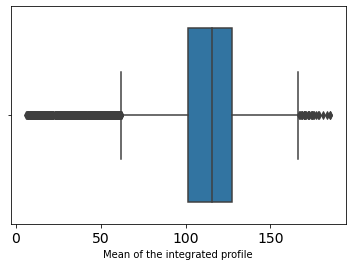

In [17]:
#setting the feature to a variable
MeanIP = df["Mean of the integrated profile"]
IQR(MeanIP)

<AxesSubplot:xlabel='Mean of the integrated profile'>

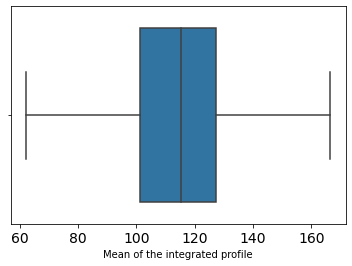

In [18]:
#up and low limits we get from using the IQR function
low_lim = 62.078125
up_lim = 166.46875
#calling the function outlier and setting the list to nums
nums = outlier(MeanIP, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Mean of the integrated profile"] = df["Mean of the integrated profile"].replace(to_replace= b, value=low_lim)
df["Mean of the integrated profile"] = df["Mean of the integrated profile"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Mean of the integrated profile"]
sns.boxplot(data)

#### Dealing with `Standard deviation of the integrated profile`

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

Q1 25 percentile of the given data is, 42.43774324
Q3 75 percentile of the given data is, 51.01096346
low_lim is 29.57791291000001
up_lim is 63.87079378999999


<AxesSubplot:xlabel='Standard deviation of the integrated profile'>

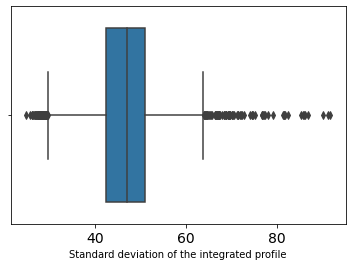

In [19]:
#setting the feature to a variable
StandarddeviationIP = df["Standard deviation of the integrated profile"]
IQR(StandarddeviationIP)

<AxesSubplot:xlabel='Standard deviation of the integrated profile'>

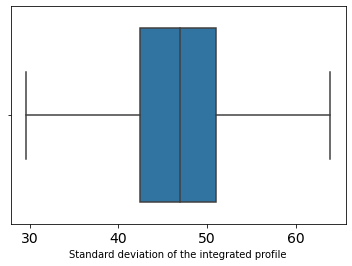

In [20]:
#up and low limits we get from using the IQR function
low_lim = 29.57791291000001
up_lim = 63.87079378999999
#calling the function outlier and setting the list to nums
nums = outlier(StandarddeviationIP, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Standard deviation of the integrated profile"] = df["Standard deviation of the integrated profile"].replace(to_replace= b, value=low_lim)
df["Standard deviation of the integrated profile"] = df["Standard deviation of the integrated profile"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Standard deviation of the integrated profile"]
sns.boxplot(data)

#### Dealing with `Excess kurtosis of the integrated profile`

Dropping the rows with missing Excess kurtosis of the integrated profile values (13.76%).

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

In [21]:
#setting null values to 0
df["Excess kurtosis of the integrated profile"].fillna(0, inplace = True)
#then removing the columns/rows that have that feature = 0
df = df[df["Excess kurtosis of the integrated profile"] != 0]

In [22]:
# verifying if theres still null values
df["Excess kurtosis of the integrated profile"].isnull().sum()

0

Q1 25 percentile of the given data is, 0.022827122999999998
Q3 75 percentile of the given data is, 0.46779173924999995
low_lim is -0.6446198013749999
up_lim is 1.1352386636249998


<AxesSubplot:xlabel='Excess kurtosis of the integrated profile'>

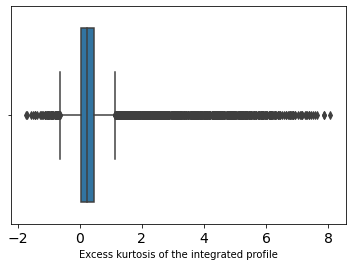

In [23]:
#setting the feature to a variable
kurtosisIP = df["Excess kurtosis of the integrated profile"]
IQR(kurtosisIP)

<AxesSubplot:xlabel='Excess kurtosis of the integrated profile'>

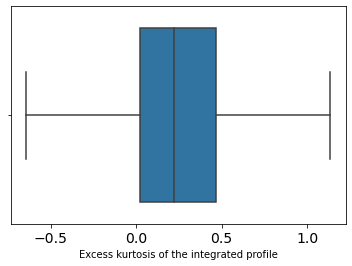

In [24]:
#up and low limits we get from using the IQR function
low_lim = -0.6446198013749999
up_lim = 1.1352386636249998
#calling the function outlier and setting the list to nums
nums = outlier(kurtosisIP, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Excess kurtosis of the integrated profile"] = df["Excess kurtosis of the integrated profile"].replace(to_replace= b, value=low_lim)
df["Excess kurtosis of the integrated profile"] = df["Excess kurtosis of the integrated profile"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Excess kurtosis of the integrated profile"]
sns.boxplot(data)

#### Dealing with `Skewness of the integrated profile	`

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

Q1 25 percentile of the given data is, -0.1874005265
Q3 75 percentile of the given data is, 0.89839891175
low_lim is -1.816099683875
up_lim is 2.527098069125


<AxesSubplot:xlabel='Skewness of the integrated profile'>

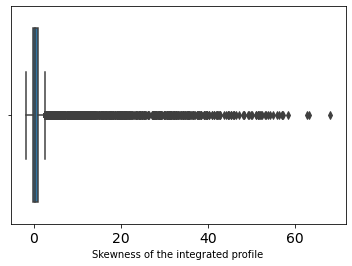

In [25]:
#setting the feature to a variable
SkewIP = df["Skewness of the integrated profile"]
IQR(SkewIP)

<AxesSubplot:xlabel='Skewness of the integrated profile'>

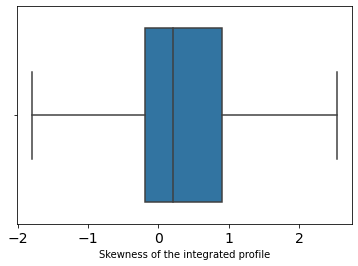

In [26]:
#up and low limits we get from using the IQR function
low_lim = -1.816099683875
up_lim = 2.527098069125
#calling the function outlier and setting the list to nums
nums = outlier(SkewIP, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Skewness of the integrated profile"] = df["Skewness of the integrated profile"].replace(to_replace= b, value=low_lim)
df["Skewness of the integrated profile"] = df["Skewness of the integrated profile"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Skewness of the integrated profile"]
sns.boxplot(data)

#### Dealing with `Mean of the DM-SNR curve	`

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

Q1 25 percentile of the given data is, 1.8944397990000001
Q3 75 percentile of the given data is, 5.44774247525
low_lim is -3.4355142153749996
up_lim is 10.777696489625


<AxesSubplot:xlabel='Mean of the DM-SNR curve'>

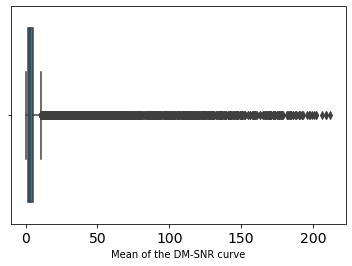

In [27]:
#setting the feature to a variable
MeanCurve = df["Mean of the DM-SNR curve"]
IQR(MeanCurve)

<AxesSubplot:xlabel='Mean of the DM-SNR curve'>

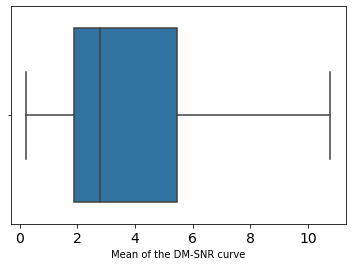

In [28]:
#up and low limits we get from using the IQR function
low_lim = -3.4355142153749996
up_lim = 10.777696489625
#calling the function outlier and setting the list to nums
nums = outlier(MeanCurve, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Mean of the DM-SNR curve"] = df["Mean of the DM-SNR curve"].replace(to_replace= b, value=low_lim)
df["Mean of the DM-SNR curve"] = df["Mean of the DM-SNR curve"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Mean of the DM-SNR curve"]
sns.boxplot(data)

#### Dealing with Standard deviation of the DM-SNR curve

Dropping the rows with missing Standard deviation of the DM-SNR curve values (9.36% ).

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

In [29]:
#setting null values to 0
df["Standard deviation of the DM-SNR curve"].fillna(0, inplace = True)
#then removing the columns/rows that have that feature = 0
df = df[df["Standard deviation of the DM-SNR curve"] != 0]

In [30]:
# verifying if theres still null values
df["Standard deviation of the DM-SNR curve"].isnull().sum()

0

Q1 25 percentile of the given data is, 14.326942885
Q3 75 percentile of the given data is, 28.20455587
low_lim is -6.489476592500003
up_lim is 49.0209753475


<AxesSubplot:xlabel='Standard deviation of the DM-SNR curve'>

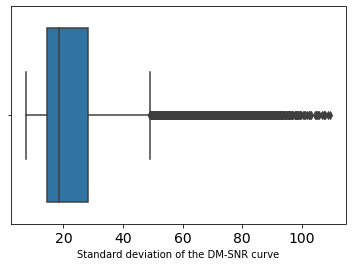

In [31]:
#setting the feature to a variable
SDCurve = df["Standard deviation of the DM-SNR curve"]
IQR(SDCurve)

<AxesSubplot:xlabel='Standard deviation of the DM-SNR curve'>

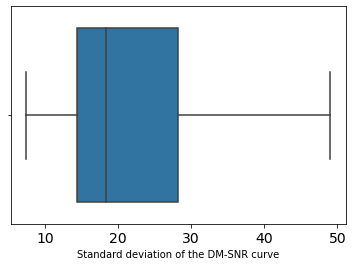

In [32]:
#up and low limits we get from using the IQR function
low_lim = -6.489476592500003
up_lim = 49.0209753475
#calling the function outlier and setting the list to nums
nums = outlier(SDCurve, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Standard deviation of the DM-SNR curve"] = df["Standard deviation of the DM-SNR curve"].replace(to_replace= b, value=low_lim)
df["Standard deviation of the DM-SNR curve"] = df["Standard deviation of the DM-SNR curve"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Standard deviation of the DM-SNR curve"]
sns.boxplot(data)

#### Dealing with  `Excess kurtosis of the DM-SNR curve`

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

Q1 25 percentile of the given data is, 5.80912114875
Q3 75 percentile of the given data is, 10.771940310000002
low_lim is -1.635107593125002
up_lim is 18.216169051875003


<AxesSubplot:xlabel='Excess kurtosis of the DM-SNR curve'>

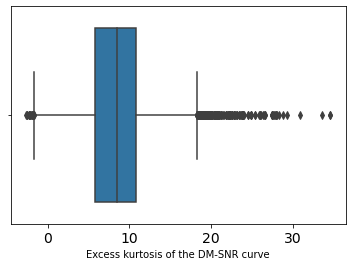

In [33]:
#setting the feature to a variable
KurtosisCurve = df["Excess kurtosis of the DM-SNR curve"]
IQR(KurtosisCurve)

<AxesSubplot:xlabel='Excess kurtosis of the DM-SNR curve'>

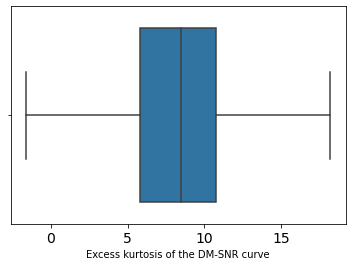

In [34]:
#up and low limits we get from using the IQR function
low_lim = -1.635107593125002
up_lim = 18.216169051875003
#calling the function outlier and setting the list to nums
nums = outlier(KurtosisCurve, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Excess kurtosis of the DM-SNR curve"] = df["Excess kurtosis of the DM-SNR curve"].replace(to_replace= b, value=low_lim)
df["Excess kurtosis of the DM-SNR curve"] = df["Excess kurtosis of the DM-SNR curve"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Excess kurtosis of the DM-SNR curve"]
sns.boxplot(data)

#### Dealing with `Skewness of the DM-SNR curve`

Since we are missing less then 5% of values in this feature 4.86% to be exact, I will fill it in using the mean.

Replacing all outliers with upper and lower limits of the feature using the Inter Quantile Range method.

In [35]:
#filling in the 4.86% missing values with the mean of the feature
df["Skewness of the DM-SNR curve"].fillna(df["Skewness of the DM-SNR curve"].mean(), inplace = True)
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,62.078125,29.577913,1.135239,2.527098,10.777696,47.301407,3.403103,11.373581,1.0
1,126.390625,61.390939,-0.024068,-0.818730,4.213211,23.096038,7.416199,61.519381,0.0
2,109.703125,53.368758,0.019301,-0.322083,2.342809,14.887972,8.997162,104.482911,0.0
3,113.898438,43.096882,0.073892,0.661630,1.440635,14.288850,13.650962,206.590696,0.0
5,131.195312,50.065903,-0.090631,-0.050357,3.226589,18.910182,7.665353,70.143022,0.0
...,...,...,...,...,...,...,...,...,...
9994,101.203125,47.595030,0.392931,0.150056,1.728261,14.089439,10.810241,138.860289,0.0
9995,109.273438,46.844443,0.369009,0.103034,1.813545,12.311299,11.144187,106.475375,0.0
9997,62.078125,34.262301,1.135239,2.527098,10.777696,49.020975,2.573222,5.976243,1.0
9998,86.875000,41.704691,0.658251,1.496190,1.163880,12.858826,13.710961,213.426502,0.0


Q1 25 percentile of the given data is, 38.332116915
Q3 75 percentile of the given data is, 137.08808585000003
low_lim is -109.80183648750003
up_lim is 285.22203925250005


<AxesSubplot:xlabel='Skewness of the DM-SNR curve'>

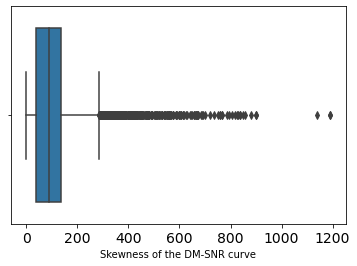

In [36]:
#setting the feature to a variable
SkewCurve = df["Skewness of the DM-SNR curve"]
IQR(SkewCurve)

<AxesSubplot:xlabel='Skewness of the DM-SNR curve'>

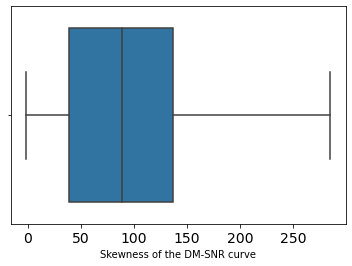

In [37]:
#up and low limits we get from using the IQR function
low_lim = -109.80183648750003
up_lim = 285.22203925250005
#calling the function outlier and setting the list to nums
nums = outlier(SkewCurve, up_lim, low_lim)
#creating 2 lists to seperate low and high outliers
a = []
b = []
#using a for loop to check all the values in nums list 
#appended to the seperate lists depending on if the values are
#lower or higher
for x in nums:
        if x > up_lim:
             a.append(x)
        elif x < low_lim:
            b.append(x)
#replacing values using the replace function         
df["Skewness of the DM-SNR curve"] = df["Skewness of the DM-SNR curve"].replace(to_replace= b, value=low_lim)
df["Skewness of the DM-SNR curve"] = df["Skewness of the DM-SNR curve"].replace(to_replace= a, value=up_lim)
#verifying that there are no more outliers using a boxplot
data = df["Skewness of the DM-SNR curve"]
sns.boxplot(data)

In [38]:
#this is now the clean data
df = df.reset_index(drop=True)
dfclean = df.copy() # saving a copy of the clean data
dfclean

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,62.078125,29.577913,1.135239,2.527098,10.777696,47.301407,3.403103,11.373581,1.0
1,126.390625,61.390939,-0.024068,-0.818730,4.213211,23.096038,7.416199,61.519381,0.0
2,109.703125,53.368758,0.019301,-0.322083,2.342809,14.887972,8.997162,104.482911,0.0
3,113.898438,43.096882,0.073892,0.661630,1.440635,14.288850,13.650962,206.590696,0.0
4,131.195312,50.065903,-0.090631,-0.050357,3.226589,18.910182,7.665353,70.143022,0.0
...,...,...,...,...,...,...,...,...,...
7793,101.203125,47.595030,0.392931,0.150056,1.728261,14.089439,10.810241,138.860289,0.0
7794,109.273438,46.844443,0.369009,0.103034,1.813545,12.311299,11.144187,106.475375,0.0
7795,62.078125,34.262301,1.135239,2.527098,10.777696,49.020975,2.573222,5.976243,1.0
7796,86.875000,41.704691,0.658251,1.496190,1.163880,12.858826,13.710961,213.426502,0.0


### 2. Normalise or Standardise features as necessary

I will perform data Normalisation on all my 8 continuous features using min max normalisation, as there is high cardinality

I am normalising the data since I have removed all the outliers and also so I can scale down the the data.

In [39]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,62.078125,29.577913,1.135239,2.527098,10.777696,47.301407,3.403103,11.373581,1.0
1,126.390625,61.390939,-0.024068,-0.818730,4.213211,23.096038,7.416199,61.519381,0.0
2,109.703125,53.368758,0.019301,-0.322083,2.342809,14.887972,8.997162,104.482911,0.0
3,113.898438,43.096882,0.073892,0.661630,1.440635,14.288850,13.650962,206.590696,0.0
4,131.195312,50.065903,-0.090631,-0.050357,3.226589,18.910182,7.665353,70.143022,0.0


In [40]:
# use sklearn's preprocessing MinMaxScaler
Ndf = df.copy()
x = Ndf.values # returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Ndf = pd.DataFrame(x_scaled, columns=Ndf.columns)

In [41]:
#data normalised using min max normalisation
Ndf.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.000000,0.000000,1.000000,1.000000,1.000000,0.958714,0.253798,0.046393,1.0
1,0.616075,0.927686,0.348653,0.225321,0.378627,0.377561,0.455956,0.221013,0.0
2,0.456219,0.693755,0.373019,0.340312,0.201581,0.180491,0.535596,0.370622,0.0
3,0.496408,0.394221,0.403691,0.568077,0.116184,0.166106,0.770030,0.726186,0.0
4,0.662101,0.597442,0.311254,0.403227,0.285237,0.277061,0.468507,0.251042,0.0


In [42]:
# confirm the transformation didn't affect our target class
Ndf.target_class.value_counts()


0.0    7093
1.0     705
Name: target_class, dtype: int64

In [43]:
df.target_class.value_counts()

0.0    7093
1.0     705
Name: target_class, dtype: int64

### 3. F1 score to decide the evaluation measure

F1 score is best suited to this matter because of the unbalanced dataset.

In our data set we have only a small percentage of positive pulsar's in the `target_class` feature

<AxesSubplot:title={'center':'Class distribution'}, xlabel='target_class'>

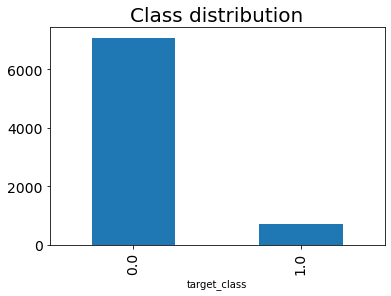

In [44]:
#verifying class imbalance
Ndf.pivot_table(index='target_class', aggfunc='size').plot(kind='bar', title = 'Class distribution')


This is something that happens very often when building models for fraud detection and This confirms that the F1 score will probably come in handy.

#### Now I will build a train test Stratified


However, it is risky to do a standard random train/test split when having strong class imbalance. Due to the very small number of positive cases, you might end up with a train and test set that have very different class distributions.

Stratified sampling is a sampling method that avoids disturbing class balance in your samples. It allows you to generate a train and a test set with the exact same class balance as in the original data.

In [63]:
#for my train test split I will use the proportions 70/30
#random = 1 so we can reproduce the results
train, test = train_test_split(Ndf, test_size = 0.3, stratify=df.target_class, random_state=1)

#### Creating a baseline model

As a baseline model, we will create a very bad model that predicts that there are no pulsar's. This comes down to generating a list of predictions that are all 0.

In [46]:
# this very bad model predicts that nobody ever buys anything
preds = [0] * len(test)

Although we already know that this model is very bad, let’s still try to find out the accuracy of this model. I use scikitlearn’s accuracy function as follows:

In [47]:
accuracy_score(test.target_class, preds)

0.9094017094017094

The accuracy of our very bad model is high: `91%`
- In the test data we know that there are few positive pulsar's, therefore it is wrong for false pulsar's `9%` of the data
- This is the exact reason why we need to worry about Recall and Precision.

In [48]:
print('Precision is: ', precision_score(test.target_class, preds))
print('Recall is: ', recall_score(test.target_class, preds))

Precision is:  0.0
Recall is:  0.0


- Precision will tell us the percentage of correctly predicted positive pulsar's, So we can see in the very bad model not a single pulsar was identified as positive therefore the `Precision = 0`
- Recall, on the other hand, tells us the percentage of positive pulsars that we have been able to find within all of the actual pulsar's. Since our model has not found a single positive pulsar, `Recall = 0`
- now lets use the F1 score to see the result

In [49]:
print('F1 is: ', f1_score(test.target_class, preds))

F1 is:  0.0


As the F1 score is the harmonic mean of precision and recall, the F1 score is also 0.
- The example model above shows that it can be very dangerous to use accuracy as a metric on imbalanced data sets. 
- Therefore, Precision, recall, and the F1-score have all proven to be much better cases in this example.

#### Now lets get the actual F1 score of our dataset

In [237]:
# Instantiate the Logistic Regression with only default settings
my_log_reg = LogisticRegression()

features = ["Mean of the integrated profile","Standard deviation of the integrated profile","Excess kurtosis of the integrated profile",
           "Skewness of the integrated profile","Mean of the DM-SNR curve","Standard deviation of the DM-SNR curve",
           "Excess kurtosis of the DM-SNR curve","Skewness of the DM-SNR curve"]

# Fit the logistic regression on the independent variables of the train data with buy as dependent variable
my_log_reg.fit(train[features], train["target_class"])

# Make a prediction using our model on the test set
preds = my_log_reg.predict(test[features])


Let’s do a detailed inspection of the predictions. In binary classification, I will use the confusion matrix to differentiate between four types of predictions.

- True positives (Pulsar's correctly predicted as Pulsar's)
- False positives (non-Pulsar's incorrectly predicted as Pulsar's)
- True negatives (non-Pulsar's correctly predicted as non-Pulsar's)
- False negatives (Pulsar's incorrectly predicted as non-Pulsar's)

In [51]:
#printing out the confusion matrix results
tn, fp, fn, tp = confusion_matrix(test['target_class'], preds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  2109 
False positives:  19 
False negatives:  35 
True Positives:  177


Now our model is more detailed, The accuracy is the simplest performance metric, so let’s see what the accuracy score is on this

In [52]:
print('Accuracy is: ', accuracy_score(test.target_class, preds))

Accuracy is:  0.9769230769230769


Interestingly the accuracy score of the logistic regression is now `97%` which is better then before.

Now I will check the precision and recall below

In [53]:
print('Precision is: ', precision_score(test.target_class, preds))
print('Recall is: ', recall_score(test.target_class, preds))

Precision is:  0.9030612244897959
Recall is:  0.8349056603773585


Now lets check the F1 score 

In [54]:
print('F1 is: ', f1_score(test.target_class, preds))

F1 is:  0.8676470588235294


#### Key points:
So the accuracy tells us that the logistic regression is just as good/better then the bad baseline model and also that the Precision and Recall tells us that the logistic regression is better.

- The total number of mistakes of the two models is the same. Therefore the accuracy is the similar.
- The second model is actually capable of finding positive cases (pulsars), whereas the first model did not find a single positive pulsar in the data. The recall of the second model is, therefore, higher (79% for the logistic regression instead of 0 for the first model).
- The first model did not find any positive pulsar's and the precision is therefore automatically zero. The logistic regression did find some positive pulsar's, so we can compute a precision. The precision shows how much of the predicted buyers were actually correct. This ends up being 91%.
- The F1 score is the metric that we are really interested in. The goal of the example was to show its added value for modeling with imbalanced data. The resulting F1 score of the first model was 0: we can be happy with this score, as it was a very bad model.
- The F1 score of the second model was 0.845. This shows that the second model, is a serious improvement from the first model. This is valuable information that we could not have obtained using accuracy as a metric because the accuracy of both models is similar.

#### Conclusion

- F1 score has been shown as a model performance metric. The F1 score becomes especially valuable when working on classification models in which our data set is imbalanced.
- F1 score combines precision and recall into a single metric. This makes it easy to use in grid search or automated optimization.

### 4. Decision Tree

Decision trees are non-parametric models: they are not controlled by a mathematical decision function and do not have weights or intercept to be optimized.

In [84]:
#creating a function which gets us the model accuracy for a classification
def model_accuracy(data):
    #features that will be used in the train set
    features = ["Mean of the integrated profile","Standard deviation of the integrated profile","Excess kurtosis of the integrated profile",
           "Skewness of the integrated profile","Mean of the DM-SNR curve","Standard deviation of the DM-SNR curve",
           "Excess kurtosis of the DM-SNR curve","Skewness of the DM-SNR curve"]

    data.score(train[features],train["target_class"])
    pred = data.predict(test[features])
    #printing classifciation report
    print(classification_report(test["target_class"], pred))
    #printing the accucary using the f1 score
    print("F1 Score is: ", np.round(f1_score(test["target_class"], pred)*100,2), "%")
    cf_matrix = confusion_matrix(test["target_class"], pred)
    #using sea born and visualising a heatmap
    sns.heatmap(cf_matrix, annot=True)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2128
         1.0       0.79      0.81      0.80       212

    accuracy                           0.96      2340
   macro avg       0.89      0.89      0.89      2340
weighted avg       0.96      0.96      0.96      2340

F1 Score is:  80.0 %


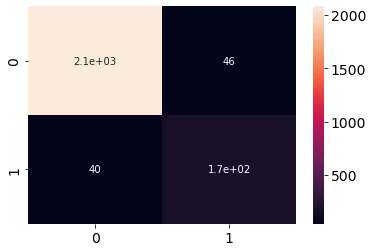

In [85]:
#decision tree model
dtc = DecisionTreeClassifier(criterion="entropy")
dtc_clf = dtc.fit(train[features], train["target_class"])

model_accuracy(dtc_clf)

### KNN Classifier

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2128
         1.0       0.90      0.84      0.87       212

    accuracy                           0.98      2340
   macro avg       0.94      0.92      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.32 %


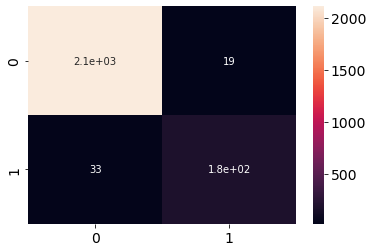

In [89]:
knn = KNeighborsClassifier() 
# fit the KNN model on the data
knn_clf = knn.fit(train[features], train["target_class"])

model_accuracy(knn_clf)

## SVM Classifiers
I will be doing the follow SVM's
- linear
- poly
- rbf
- sigmoid

1. Fit SVC with a linear kernel on the traning data and check the accuracy on the testing data.

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2128
         1.0       0.90      0.85      0.88       212

    accuracy                           0.98      2340
   macro avg       0.94      0.92      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.59 %


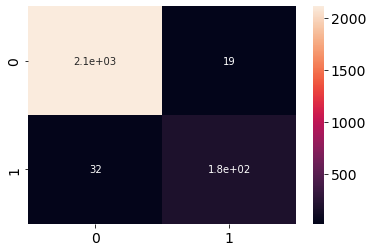

In [94]:
svc = SVC(kernel='linear')
svc_clf = svc.fit(train[features], train["target_class"])

model_accuracy(svc_clf)

2. Fit SVC with a radial basis function (rbf) kernel on the traning data and check the accuracy on the testing data.

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2128
         1.0       0.92      0.83      0.87       212

    accuracy                           0.98      2340
   macro avg       0.95      0.91      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.41 %


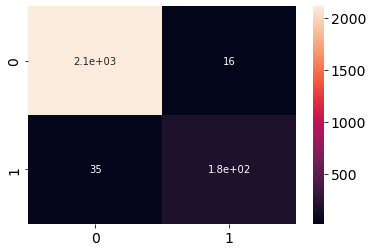

In [95]:
svc2 = SVC(kernel='rbf')
svc2_clf = svc2.fit(train[features], train["target_class"])

model_accuracy(svc2_clf)

3. Fit SVC with a polynomial (poly) kernel on the traning data and check the accuracy on the testing data. 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2128
         1.0       0.91      0.85      0.88       212

    accuracy                           0.98      2340
   macro avg       0.95      0.92      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.8 %


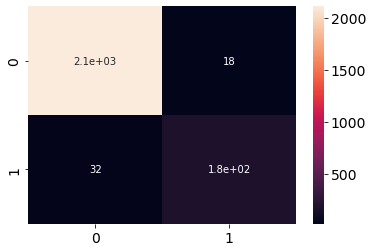

In [100]:
svc3 = SVC(kernel='poly', degree = 2) 
svc3_clf = svc3.fit(train[features], train["target_class"])

model_accuracy(svc3_clf)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2128
         1.0       0.91      0.84      0.87       212

    accuracy                           0.98      2340
   macro avg       0.95      0.92      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.47 %


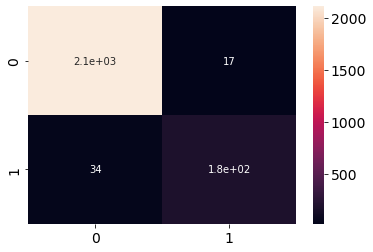

In [101]:
svc3 = SVC(kernel='poly', degree = 3) 
svc3_clf = svc3.fit(train[features], train["target_class"])

model_accuracy(svc3_clf)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2128
         1.0       0.92      0.83      0.87       212

    accuracy                           0.98      2340
   macro avg       0.95      0.91      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.41 %


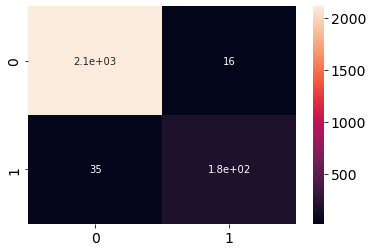

In [102]:
svc3 = SVC(kernel='poly', degree = 4) 
svc3_clf = svc3.fit(train[features], train["target_class"])

model_accuracy(svc3_clf)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2128
         1.0       0.91      0.83      0.87       212

    accuracy                           0.98      2340
   macro avg       0.95      0.91      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  87.19 %


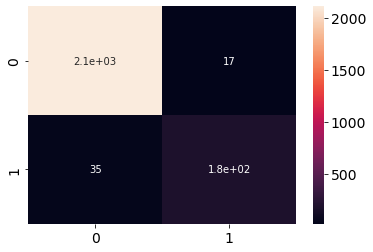

In [104]:
svc3 = SVC(kernel='poly', degree = 5) 
svc3_clf = svc3.fit(train[features], train["target_class"])

model_accuracy(svc3_clf)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2128
         1.0       0.88      0.85      0.87       212

    accuracy                           0.98      2340
   macro avg       0.93      0.92      0.93      2340
weighted avg       0.98      0.98      0.98      2340

F1 Score is:  86.54 %


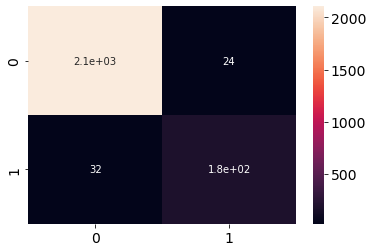

In [108]:
svc3 = SVC(kernel='poly', degree = 6) 
svc3_clf = svc3.fit(train[features], train["target_class"])

model_accuracy(svc3_clf)

The difference in the accuracy scores of training and testing dataset is the least for SVM classifier polynomial kernel with a degree of 2.

4. Fit SVC with a sigmoid kernel on the traning data and check the accuracy on the testing data

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2128
         1.0       0.00      0.00      0.00       212

    accuracy                           0.86      2340
   macro avg       0.45      0.47      0.46      2340
weighted avg       0.82      0.86      0.84      2340

F1 Score is:  0.0 %


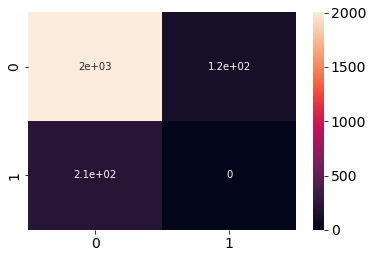

In [107]:
svc4 = SVC(kernel='sigmoid')
svc4_clf = svc4.fit(train[features], train["target_class"])

model_accuracy(svc4_clf)

### Results for each Classifier

- `Decision Tree` = 80%

- `KNN` = 87.32%

- `Linear` = 87.59%

- `Poly` =  87.8%

- `RBF` = 87.41%

- `Sigmoid` = 0%

### Comparison
SVM with the `Polynomial` kernel seems to be the best classifier as the F1 score is highest for the testing dataset and the difference in F1 scores between the training and testing dataset is less. Interestingly, we observe that the generalisation F1 score accuracy (accuracy on test data) goes down as we increase the degree of the polynomial in the SVM kernel. This is because of overfitting. The dataset is too limited to learn a highly complex model.
The rest of the classifiers also had a close evaluation, but I was suprised to see that sigmoid evaluation has lead to 0%.

### 5. Filtering

- Filter techniques for feature selection rank the features based on some predictiveness score (e.g. information gain, Gini index, chi-square statistic, relief algorithm, etc.). 
- Information gain (called mutual information when used for classification tasks) and Gini index are the most common when performing information theoretic analysis.
- Mutual information measures the amount of dependency between two random variables and is based on entropy - a value of 0 indicates variables are completely independent. 
- We select mutual entropy/mutual information/information gain as the criterion for our filter technique for feature selection because it generally yields better results than Breiman's Gini index, although it is more computationally expensive than the latter.
- Setting an integral value for `random_state` guarantees reproducible results

In [166]:
i_scores = mutual_info_classif(train[features], train["target_class"])

# put the i_scores in a dataframe and sort
features_info_gain = pd.DataFrame(i_scores, index = train[features].columns, columns =['I-Gain'])
features_info_gain.sort_values(by=['I-Gain'], ascending=False, inplace=True)
features_info_gain

,I-Gain
Excess kurtosis of the integrated profile,0.223045
Mean of the integrated profile,0.194114
Skewness of the integrated profile,0.155976
Standard deviation of the DM-SNR curve,0.125811
Mean of the DM-SNR curve,0.116239
Excess kurtosis of the DM-SNR curve,0.114138
Skewness of the DM-SNR curve,0.107281
Standard deviation of the integrated profile,0.087307


We can now plot the features with non-zero information gain in descending order.

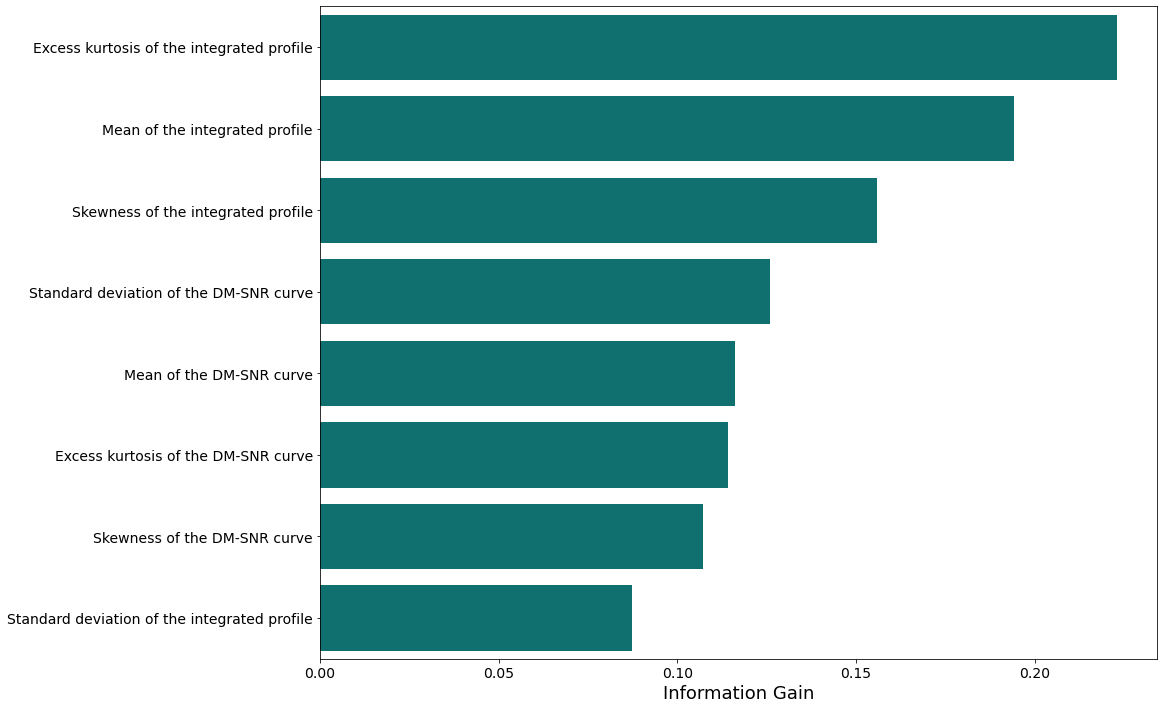

In [169]:
plt.figure(figsize=(15, 12))
f = features_info_gain[features_info_gain["I-Gain"] > 0]
sns.barplot(x="I-Gain", y=f.index, data=f, color="teal")
plt.xlabel("Information Gain", fontsize=18)
plt.show()

In [173]:
# Generate top 3 and bottom 3 dataframes and produce the corresponding X (numpy) arrays
top3_features_train = train[features][features_info_gain.index[:3]]
bottom3_features_train = train[features][features_info_gain.index[-3:]]


In [174]:
#here are the top 3 features in the dataset
top3_features_train

,Excess kurtosis of the integrated profile,Mean of the integrated profile,Skewness of the integrated profile
4434,0.307166,0.575438,0.418018
6764,1.000000,0.308487,0.756077
4541,0.451756,0.539515,0.424594
4031,0.656492,0.285885,0.512852
4883,0.503218,0.491693,0.339094
...,...,...,...
7222,0.388856,0.632316,0.435807
6257,0.610580,0.433693,0.623276
5545,0.361994,0.646610,0.413632
2499,0.435994,0.649603,0.265151


In [175]:
#bottom 3 features in the dataset
bottom3_features_train

,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Standard deviation of the integrated profile
4434,0.475794,0.224126,0.559966
6764,0.563131,0.376142,0.630458
4541,0.278422,0.052892,0.564416
4031,0.986259,1.000000,0.470818
4883,0.627678,0.585430,0.640156
...,...,...,...
7222,0.606279,0.490552,0.542287
6257,0.658976,0.511245,0.321273
5545,1.000000,1.000000,0.531728
2499,0.940889,1.000000,0.707232


#### Results
Top 3 most discriminative features
- Excess kurtosis of the integrated profile
- Mean of the integrated profile
- Skewness of the integrated profile

Top 3 bottom discriminative features
- Excess kurtosis of the DM-SNR curve
- Skewness of the DM-SNR curve
- Standard deviation of the integrated profile


#### Running SVM Classifier's on top 3 and buttom 3

In [193]:
btop3 = ["Excess kurtosis of the DM-SNR curve","Skewness of the DM-SNR curve","Standard deviation of the integrated profile"]
ftop3 = ["Excess kurtosis of the integrated profile","Mean of the integrated profile","Skewness of the integrated profile"]

In [194]:
#changing our function we created in task 4 to use it for top 3 features
#creating a function which gets us the model accuracy for a classification
def model_accuracy2(data):
    #features that will be used in the train set
    
    ftop3 = ["Excess kurtosis of the integrated profile","Mean of the integrated profile","Skewness of the integrated profile"]
    
    data.score(train[ftop3],train["target_class"])
    pred = data.predict(test[ftop3])
    #printing classifciation report
    print(classification_report(test["target_class"], pred))
    #printing the accucary using the f1 score
    print("F1 Score is: ", np.round(f1_score(test["target_class"], pred)*100,2), "%")
    cf_matrix = confusion_matrix(test["target_class"], pred)
    #using sea born and visualising a heatmap
    sns.heatmap(cf_matrix, annot=True)

In [202]:
#changing our function we created in task 4 to use it for bottom 3 features
#creating a function which gets us the model accuracy for a classification
def model_accuracy3(data):
    #features that will be used in the train set
    
    btop3 = ["Excess kurtosis of the DM-SNR curve","Skewness of the DM-SNR curve","Standard deviation of the integrated profile"]
    data.score(train[btop3],train["target_class"])
    pred = data.predict(test[btop3])
    #printing classifciation report
    print(classification_report(test["target_class"], pred))
    #printing the accucary using the f1 score
    print("F1 Score is: ", np.round(f1_score(test["target_class"], pred)*100,2), "%")
    cf_matrix = confusion_matrix(test["target_class"], pred)
    #using sea born and visualising a heatmap
    sns.heatmap(cf_matrix, annot=True)

#### Top 3 features

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2128
         1.0       0.78      0.83      0.81       212

    accuracy                           0.96      2340
   macro avg       0.88      0.91      0.89      2340
weighted avg       0.97      0.96      0.96      2340

F1 Score is:  80.82 %


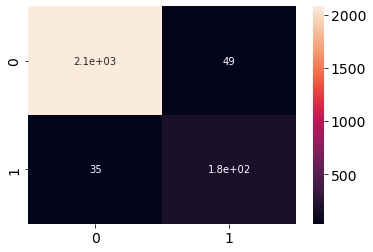

In [187]:
#linear SVM for top 3 features
Top3 = SVC(kernel='linear')
Top3_clf = Top3.fit(train[ftop3], train["target_class"])
model_accuracy2(Top3_clf)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2128
         1.0       0.85      0.83      0.84       212

    accuracy                           0.97      2340
   macro avg       0.92      0.91      0.91      2340
weighted avg       0.97      0.97      0.97      2340

F1 Score is:  84.09 %


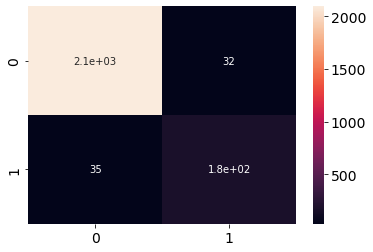

In [188]:
#RBF SVM for top 3 features
Top3 = SVC(kernel='rbf')
Top3_clf = Top3.fit(train[ftop3], train["target_class"])

model_accuracy2(Top3_clf)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2128
         1.0       0.82      0.83      0.83       212

    accuracy                           0.97      2340
   macro avg       0.90      0.91      0.90      2340
weighted avg       0.97      0.97      0.97      2340

F1 Score is:  82.52 %


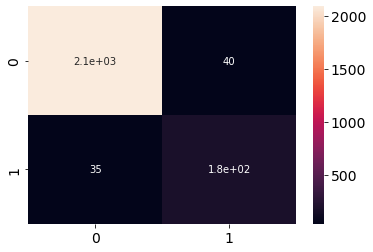

In [189]:
#polynomial SVM for top 3 features
Top3 = SVC(kernel='poly', degree = 2)
Top3_clf = Top3.fit(train[ftop3], train["target_class"])

model_accuracy2(Top3_clf)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2128
         1.0       0.00      0.00      0.00       212

    accuracy                           0.91      2340
   macro avg       0.45      0.50      0.48      2340
weighted avg       0.83      0.91      0.87      2340

F1 Score is:  0.0 %


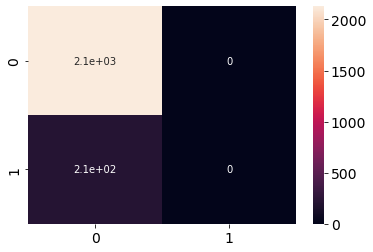

In [191]:
#sigmoid SVM for top 3 features
Top3 = SVC(kernel='sigmoid')
Top3_clf = Top3.fit(train[ftop3], train["target_class"])

model_accuracy2(Top3_clf)

#### Bottom 3 features

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2128
         1.0       0.88      0.52      0.66       212

    accuracy                           0.95      2340
   macro avg       0.92      0.76      0.82      2340
weighted avg       0.95      0.95      0.94      2340

F1 Score is:  65.68 %


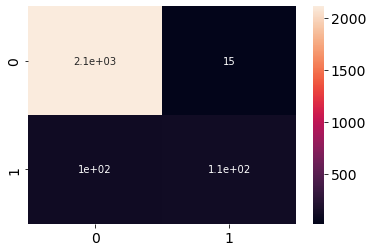

In [203]:
#Linear SVM for bottom 3 features
bottom = SVC(kernel='linear')
bottom_clf = bottom.fit(train[btop3], train["target_class"])

model_accuracy3(bottom_clf)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2128
         1.0       0.89      0.51      0.65       212

    accuracy                           0.95      2340
   macro avg       0.92      0.75      0.81      2340
weighted avg       0.95      0.95      0.94      2340

F1 Score is:  65.27 %


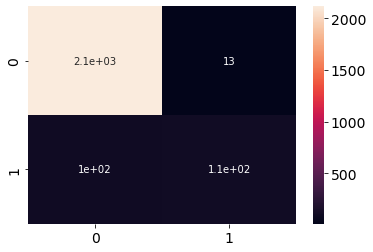

In [204]:
#RBF SVM for bottom 3 features
bottom = SVC(kernel='rbf')
bottom2_clf = bottom.fit(train[btop3], train["target_class"])

model_accuracy3(bottom2_clf)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2128
         1.0       0.82      0.61      0.70       212

    accuracy                           0.95      2340
   macro avg       0.89      0.80      0.84      2340
weighted avg       0.95      0.95      0.95      2340

F1 Score is:  70.08 %


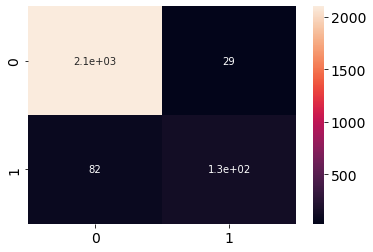

In [206]:
#polynomial SVM for bottom 3 features
bottom = SVC(kernel='poly', degree = 2)
bottom3_clf = bottom.fit(train[btop3], train["target_class"])

model_accuracy3(bottom3_clf)

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      2128
         1.0       0.02      0.02      0.02       212

    accuracy                           0.83      2340
   macro avg       0.46      0.46      0.46      2340
weighted avg       0.82      0.83      0.82      2340

F1 Score is:  1.92 %


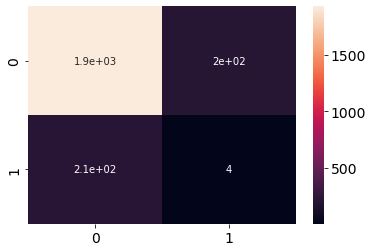

In [208]:
#Sigmoid SVM for bottom 3 features
bottom = SVC(kernel='sigmoid')
bottom4_clf = bottom.fit(train[btop3], train["target_class"])

model_accuracy3(bottom4_clf)

#### Results
Using top 3 features and running 4 `SVM` Classifier's, these are the results:

- Linear SVM = `80.82%`
- RBF SVM = `84.09%`
- Polynomial SVM = `82.52%` 
- Sigmoid SVM = `0%`

Using bottom 3 features and running 4 `SVM` Classifier's, these are the results:

- Linear SVM = `65.68%`
- RBF SVM = `65.27%`
- Polynomial SVM = `70.08%` 
- Sigmoid SVM = `1.92%`

As we can see the Top 3 features, are better then the bottom 3 features.

### 6. Wrappers (Sequential Feature Selection)
Wrapper techniques, although more computationally expensive than filters, are good at dealing with issues such as the lack of model bias and feature dependencies. The classifier is inherently part of the selection algorithm.

In [132]:
train.target_class.value_counts()

0.0    4965
1.0     493
Name: target_class, dtype: int64

- Due to the high target class imbalance, we will use F1 as the scoring metric for the sequential feature selector wrapper technique (that chooses a subset by adding/removing one feature at a time).
- With `k_features` as `"best"`

In [209]:
#function to re-use when running on different classifiers,
def wrapper(data):
    sfs_forward = SFS(data, 
                      k_features="best", 
                      forward=True, 
                      floating=False,
                      scoring='f1')

    # try the sfs_forward model on the 
    sfs_forward = sfs_forward.fit(train[features], train["target_class"])

    fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='F1 Score')

    plt.ylim([0.75, 1])
    plt.title('Sequential Forward Selection (w. StdDev)')
    plt.grid()
    plt.show()
    print(sfs_forward.k_feature_names_)
    return sfs_forward

#### KNN Classifier

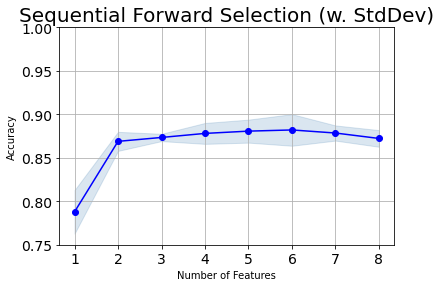

('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')


In [171]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
#sfs = wrapper(knn)
sfs = wrapper(knn)


In [151]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.7415730337078652, 0.7885714285714287, 0.811...",0.787887,"(Mean of the integrated profile,)",0.032167,0.025027,0.012514
2,"(0, 2)","[0.8484848484848486, 0.8704663212435233, 0.869...",0.86893,"(Mean of the integrated profile, Excess kurtos...",0.014069,0.010946,0.005473
3,"(0, 2, 5)","[0.8762886597938143, 0.8783068783068783, 0.867...",0.873421,"(Mean of the integrated profile, Excess kurtos...",0.005399,0.0042,0.0021
4,"(0, 2, 5, 6)","[0.8631578947368421, 0.8842105263157896, 0.880...",0.878068,"(Mean of the integrated profile, Excess kurtos...",0.01544,0.012013,0.006006
5,"(0, 2, 3, 5, 6)","[0.869109947643979, 0.8808290155440415, 0.8691...",0.880687,"(Mean of the integrated profile, Excess kurtos...",0.016998,0.013225,0.006613
6,"(0, 2, 3, 5, 6, 7)","[0.8704663212435233, 0.8854166666666665, 0.873...",0.882044,"(Mean of the integrated profile, Excess kurtos...",0.023343,0.018161,0.009081
7,"(0, 2, 3, 4, 5, 6, 7)","[0.875, 0.8795811518324607, 0.8736842105263157...",0.878513,"(Mean of the integrated profile, Excess kurtos...",0.011206,0.008719,0.004359
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8663101604278074, 0.8736842105263157, 0.860...",0.872288,"(Mean of the integrated profile, Standard devi...",0.012315,0.009582,0.004791


#### Decision Tree

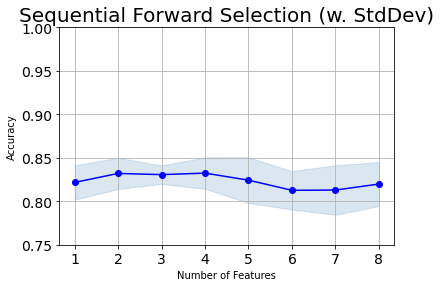

('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve')


In [152]:
#Decision Tree Classifier
dt = DecisionTreeClassifier(criterion="entropy")
sfs = wrapper(dt)

In [153]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8374384236453203, 0.784688995215311, 0.8390...",0.821687,"(Excess kurtosis of the integrated profile,)",0.02533,0.019707,0.009854
2,"(2, 3)","[0.8405797101449276, 0.798076923076923, 0.8457...",0.83204,"(Excess kurtosis of the integrated profile, Sk...",0.023047,0.017931,0.008966
3,"(2, 3, 5)","[0.8195121951219513, 0.8252427184466019, 0.821...",0.830696,"(Excess kurtosis of the integrated profile, Sk...",0.013698,0.010657,0.005329
4,"(0, 2, 3, 5)","[0.83, 0.8615384615384615, 0.8258706467661691,...",0.832418,"(Mean of the integrated profile, Excess kurtos...",0.023248,0.018088,0.009044
5,"(0, 2, 3, 5, 7)","[0.8039215686274511, 0.8324873096446701, 0.865...",0.824311,"(Mean of the integrated profile, Excess kurtos...",0.033709,0.026227,0.013114
6,"(0, 2, 3, 4, 5, 7)","[0.8200000000000001, 0.8309178743961353, 0.827...",0.812654,"(Mean of the integrated profile, Excess kurtos...",0.028385,0.022084,0.011042
7,"(0, 1, 2, 3, 4, 5, 7)","[0.7692307692307692, 0.8442211055276383, 0.821...",0.812952,"(Mean of the integrated profile, Standard devi...",0.036617,0.028489,0.014244
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7979797979797979, 0.86, 0.7980295566502463,...",0.819831,"(Mean of the integrated profile, Standard devi...",0.032421,0.025225,0.012612


#### Linear SVM

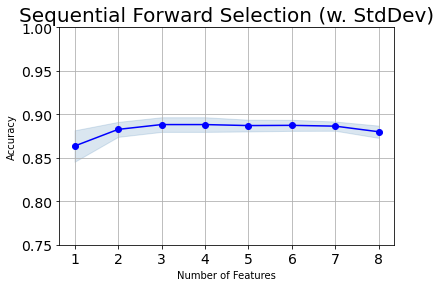

('Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve')


In [172]:
svc = SVC(kernel='linear')
sfs = wrapper(svc)

In [155]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8461538461538461, 0.8374384236453203, 0.882...",0.863511,"(Excess kurtosis of the integrated profile,)",0.02324,0.018082,0.009041
2,"(2, 5)","[0.8717948717948718, 0.8854166666666665, 0.876...",0.882677,"(Excess kurtosis of the integrated profile, St...",0.011046,0.008595,0.004297
3,"(2, 3, 5)","[0.8762886597938143, 0.8854166666666665, 0.885...",0.88823,"(Excess kurtosis of the integrated profile, Sk...",0.010814,0.008414,0.004207
4,"(2, 3, 5, 7)","[0.8762886597938143, 0.8854166666666665, 0.885...",0.88823,"(Excess kurtosis of the integrated profile, Sk...",0.010814,0.008414,0.004207
5,"(1, 2, 3, 5, 7)","[0.8762886597938143, 0.8854166666666665, 0.885...",0.887086,"(Standard deviation of the integrated profile,...",0.008673,0.006748,0.003374
6,"(0, 1, 2, 3, 5, 7)","[0.8775510204081632, 0.8854166666666665, 0.885...",0.887338,"(Mean of the integrated profile, Standard devi...",0.008164,0.006352,0.003176
7,"(0, 1, 2, 3, 5, 6, 7)","[0.8775510204081632, 0.8854166666666665, 0.885...",0.88641,"(Mean of the integrated profile, Standard devi...",0.006803,0.005293,0.002647
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8717948717948718, 0.8795811518324607, 0.875...",0.879936,"(Mean of the integrated profile, Standard devi...",0.009066,0.007053,0.003527


#### RBF SVM

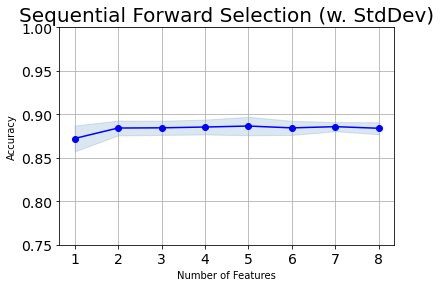

('Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')


In [156]:
svc2 = SVC(kernel='rbf')
sfs = wrapper(svc2)

In [157]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8484848484848486, 0.8673469387755102, 0.880...",0.872206,"(Excess kurtosis of the integrated profile,)",0.019163,0.014909,0.007455
2,"(2, 5)","[0.8762886597938143, 0.8783068783068783, 0.879...",0.88427,"(Excess kurtosis of the integrated profile, St...",0.010968,0.008533,0.004267
3,"(2, 5, 7)","[0.8762886597938143, 0.8783068783068783, 0.885...",0.884492,"(Excess kurtosis of the integrated profile, St...",0.01049,0.008162,0.004081
4,"(1, 2, 5, 7)","[0.8762886597938143, 0.8783068783068783, 0.885...",0.885404,"(Standard deviation of the integrated profile,...",0.010955,0.008523,0.004262
5,"(1, 2, 5, 6, 7)","[0.8762886597938143, 0.8783068783068783, 0.885...",0.88655,"(Standard deviation of the integrated profile,...",0.013634,0.010608,0.005304
6,"(1, 2, 3, 5, 6, 7)","[0.8783068783068783, 0.8783068783068783, 0.879...",0.88443,"(Standard deviation of the integrated profile,...",0.010425,0.008111,0.004056
7,"(1, 2, 3, 4, 5, 6, 7)","[0.8842105263157896, 0.8783068783068783, 0.885...",0.885831,"(Standard deviation of the integrated profile,...",0.006781,0.005275,0.002638
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.875, 0.8783068783068783, 0.8854166666666665...",0.883989,"(Mean of the integrated profile, Standard devi...",0.008847,0.006883,0.003442


#### Polynomial SVM

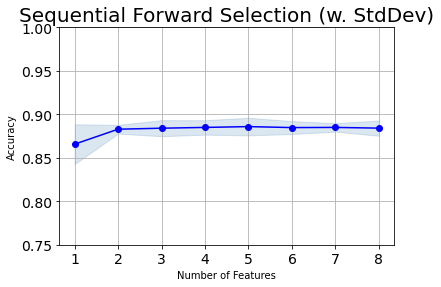

('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Skewness of the DM-SNR curve')


In [158]:
svc3 = SVC(kernel='poly', degree = 2)
sfs = wrapper(svc3)

In [159]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.8349514563106796, 0.8415841584158416, 0.886...",0.865662,"(Excess kurtosis of the integrated profile,)",0.029386,0.022863,0.011432
2,"(2, 5)","[0.8775510204081632, 0.8783068783068783, 0.880...",0.882888,"(Excess kurtosis of the integrated profile, St...",0.006508,0.005064,0.002532
3,"(2, 5, 7)","[0.8730964467005075, 0.8783068783068783, 0.885...",0.884064,"(Excess kurtosis of the integrated profile, St...",0.011883,0.009245,0.004623
4,"(0, 2, 5, 7)","[0.8775510204081632, 0.8783068783068783, 0.885...",0.884955,"(Mean of the integrated profile, Excess kurtos...",0.010684,0.008313,0.004156
5,"(0, 2, 4, 5, 7)","[0.8775510204081632, 0.8783068783068783, 0.885...",0.885903,"(Mean of the integrated profile, Excess kurtos...",0.012994,0.01011,0.005055
6,"(0, 2, 4, 5, 6, 7)","[0.8717948717948718, 0.8842105263157896, 0.885...",0.884772,"(Mean of the integrated profile, Excess kurtos...",0.009567,0.007443,0.003722
7,"(0, 2, 3, 4, 5, 6, 7)","[0.8775510204081632, 0.8900523560209425, 0.885...",0.884959,"(Mean of the integrated profile, Excess kurtos...",0.00623,0.004847,0.002423
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.8673469387755102, 0.8900523560209425, 0.885...",0.884141,"(Mean of the integrated profile, Standard devi...",0.011346,0.008828,0.004414


#### Sigmoid SVM

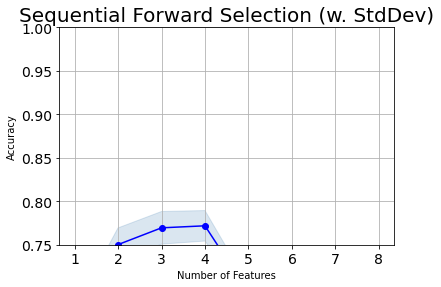

('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')


In [160]:
svc4 = SVC(kernel='sigmoid')
sfs = wrapper(svc4)

In [161]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.6107784431137725, 0.6629834254143646, 0.642...",0.652371,"(Mean of the integrated profile,)",0.030545,0.023765,0.011883
2,"(0, 2)","[0.7301587301587302, 0.7301587301587302, 0.753...",0.750226,"(Mean of the integrated profile, Excess kurtos...",0.02463,0.019163,0.009582
3,"(0, 2, 6)","[0.7407407407407408, 0.7551020408163266, 0.785...",0.769503,"(Mean of the integrated profile, Excess kurtos...",0.024109,0.018758,0.009379
4,"(0, 2, 6, 7)","[0.7487179487179487, 0.758974358974359, 0.7939...",0.771846,"(Mean of the integrated profile, Excess kurtos...",0.022542,0.017538,0.008769
5,"(0, 1, 2, 6, 7)","[0.6857142857142856, 0.6839378238341969, 0.697...",0.695132,"(Mean of the integrated profile, Standard devi...",0.011394,0.008865,0.004432
6,"(0, 1, 2, 4, 6, 7)","[0.013333333333333334, 0.011111111111111112, 0...",0.025833,"(Mean of the integrated profile, Standard devi...",0.017566,0.013667,0.006833
7,"(0, 1, 2, 4, 5, 6, 7)","[0.01342281879194631, 0.011363636363636366, 0....",0.019592,"(Mean of the integrated profile, Standard devi...",0.012842,0.009992,0.004996
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.014285714285714287, 0.0, 0.0, 0.0, 0.013986...",0.005654,"(Mean of the integrated profile, Standard devi...",0.008902,0.006926,0.003463


`KNN Classifier:`
('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')

- 6 features has the highest accuracy score. Therefore, 6 seems like a better choice for the number of features for this dataset using the KNN Classifier. 

- F1 Score = 88.2044%

-
`DecisionTree:`
('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve')

- 4 features has the highest accuracy score. Therefore, 4 seems like a better choice for the number of features for this dataset using the DecisionTree Classifier. 

- F1 Score = 83.2418%

`Linear Kernal:`
('Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve')

- 3 features has the highest accuracy score. Therefore, 3 seems like a better choice for the number of features for this dataset using the Linear SVM Classifier. 

- F1 Score = 88.823%

`RBF Kernal:`
('Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')

- 5 features has the highest accuracy score. Therefore, 5 seems like a better choice for the number of features for this dataset using the RBF SVM Classifier. 

- F1 Sscore = 88.655%

`Polynomial:`
('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Skewness of the DM-SNR curve')

- 5 features has the highest accuracy score. Therefore, 5 seems like a better choice for the number of features for this dataset using the Polynomial SVM Classifier. 

- F1 Score = 88.5903%

`Sigmoid:`
('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')

- 4 features has the highest accuracy score. Therefore, 4 seems like a better choice for the number of features for this dataset using the Polynomial SVM Classifier. 

- F1 Score = 77.1846%

- As expected, feature selection with filters is much faster than wrappers.
- On average, sequential search (wrapper) using SVM takes the longest time of all the classifiers.
- Decision Tree and k-NN classifiers yield very similar average scores.

### 7. Comparing Classifiers

When we examined the accuracy of models on subsets, we discovered that all models had reduced accuracy than when we trained and tested the model on all attributes. As a result, we may infer that model accuracy is highest on comprehensive features.

It can be seen that our accuracy is poor compared with that of task 4. This is because the model performs significantly better in task 4 when it comes to generating results. Accuracy, the relative efficacy of the various classifiers, and configuration settings are critical. This is because the success of machine learning models is heavily dependent on the quality of the training dataset, among other things.

This demonstrates that the relative effectiveness of the various classifiers and configuration parameters is consistent. This is because the performance of machine learning models greatly depends, among other things, on the quality of the training data. This is because the quality of training data depends on the consistency of labels assigned to similar items. For this reason, using different subsets based on task 6 and task 5 in comparison to task 4, the performance is similar, even when the two subsets are of different models.

In general, comparing each classifier with the other classifier with a different set of subsets seems to be consistent, as does the result having low accuracy in comparison to the other tasks in terms of accuracy and everything else associated with them.




### 8.  Plotting ROC curves 

An ROC curve plots the sensitivity versus specificity of a binary classifier system as its discrimination threshold is varied. First, define a dummy classifier that acts as a baseline and always predicts the majority class without learning anything from the data.

In [242]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(train[features],train["target_class"])
print(f"Accuracy of the dummy classifier: " + str(dummy_classifier.score(test[features],test["target_class"])))
print(f"F1: " + str(f1_score(test["target_class"], dummy_classifier.predict(test[features]))))

Accuracy of the dummy classifier: 0.9094017094017094
F1: 0.0


The high accuracy and 0 F1 score reflects the class imbalance issue in the dataset. Next, ROC curves can be plotted for target class = 1 with each of the chosen classifiers. Comparing the models is done using the area under the curve (AUROC/AUC), since in general, the higher the AUC, the better the model is at distinguishing between 1 and 0.

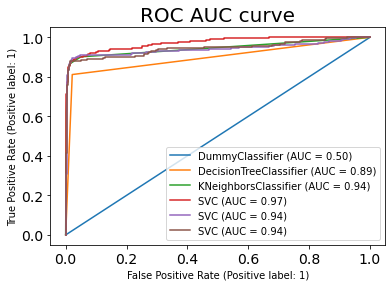

In [251]:
#disp = RocCurveDisplay.from_estimator(classifier,test[features],test["target_class"], pos_label=1)

disp = RocCurveDisplay.from_estimator(dummy_classifier,test[features],test["target_class"], pos_label=1)
disp = RocCurveDisplay.from_estimator(dtc_clf,test[features],test["target_class"], pos_label=1, ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(knn_clf,test[features],test["target_class"], pos_label=1, ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(svc_clf,test[features],test["target_class"], pos_label=1, ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(svc2_clf,test[features],test["target_class"], pos_label=1, ax=disp.ax_)
disp = RocCurveDisplay.from_estimator(svc3_clf,test[features],test["target_class"], pos_label=1, ax=disp.ax_)

disp.ax_.set_title("ROC AUC curve");

From the ROC curves above, we learn that the `linear kernal` has the maximum area under the curve (AUC), implying the greatest ability to separate the target classes. The performance is satisfactory, as a score of 0.97 is quite close to perfect score of 1. It is considerably better than the dummy classifier that always predicts the majority class.

Therefore: `linear kernal` performs better than any other combination and SVM as well.

## 9. Bonus Task's

#### i. correlation of the various features with the target class

this step I'll use some basic visualizations to begin to explore relations in the dataset. 

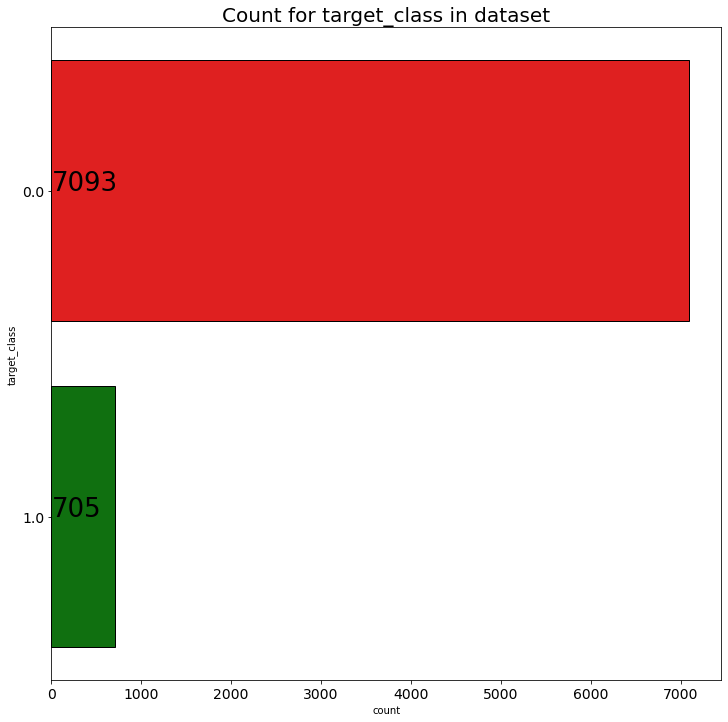

In [211]:
# First I want to see how many instances of each class we have in the dataset 
plt.figure(figsize=(12,12))
ax = sns.countplot(y = dfclean.target_class, palette=["red", "green"],
                  linewidth=1, edgecolor="black")
for i, j in enumerate(dfclean["target_class"].value_counts().values):
    ax.text(.75, i, j, fontsize=26)
plt.title("Count for target_class in dataset");

Only 9% of our target_class are actual pulsars, leaving 91% of the candidate stars in the false-positive category.

Correlation & multicollinearity heatmap for the features

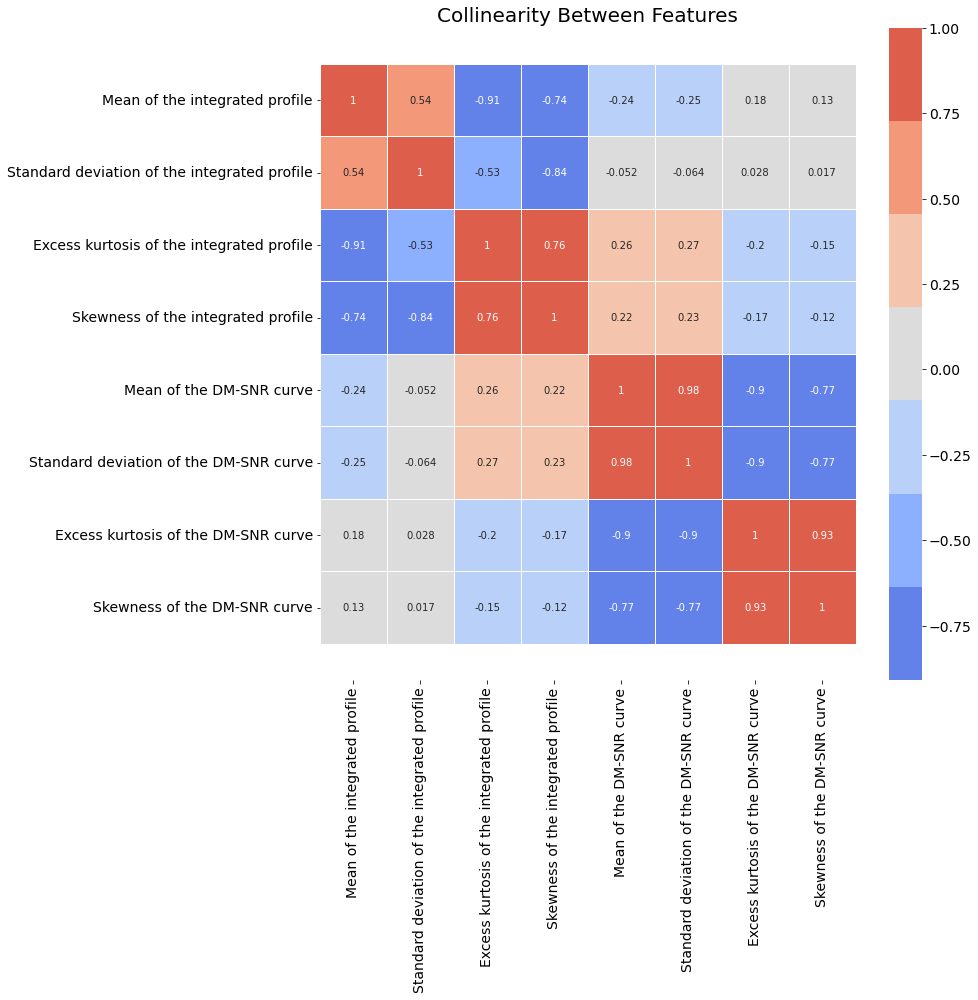

In [212]:
# Next I'll look at possible multicollinearity among the features
correlation = dfclean.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Boxplots for features related to target_class


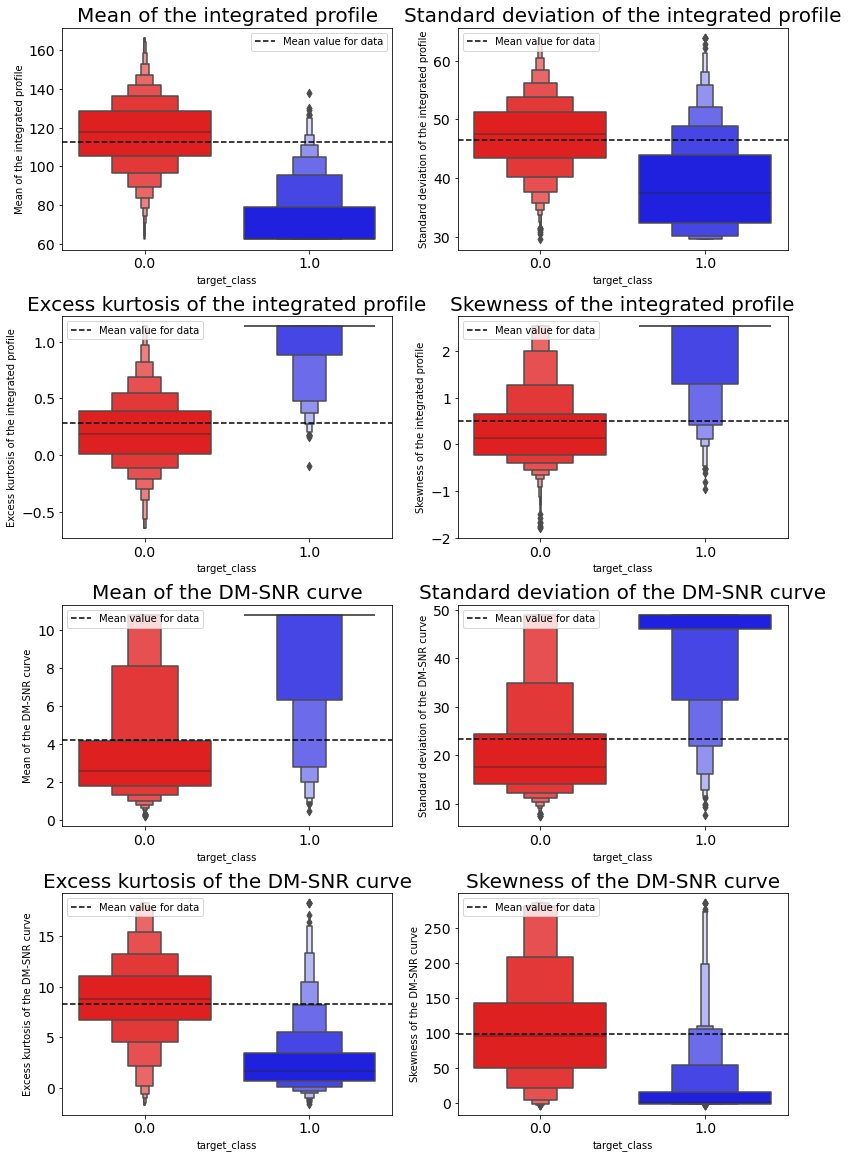

In [217]:
columns = [x for x in dfclean.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.boxenplot(x=dfclean["target_class"],y=dfclean[i],palette=["red","blue"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(dfclean[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")
    
print ("Boxplots for features related to target_class")


The mean and standard deviation of the DM-SNR curve attributes seem to be correlated, also, the kurtosis and skewness of the DM-SNR curve also seem to be correlated. Finally, the kurtosis of the integrated pulse profile seems to be fairly correlated with our target_class.

By looking at the boxplots of the attributes, here are some brief summaries of what is shown:

-  mean of the IPP appears to be higher for false positives.
- The standared deviation of the IPP for the false positives appear to be slightly higher and have more upper end outliers.
- The kurtosis of the IPP seems to be smaller/close to 0 for  false positives.
- The skewness of the IPP again is around 0 for false positives, while for actual pulsars, it is much larger.
- The mean of the DM-SNR curve is typically higher for actual pulsars, compared to false positives.
- The standard deviation of the DM-SNR curve is higher for actual pulsars than false positives.
- The kurtosis of the DM-SNR curve is higher for false positives than for actual pulsars.
- The skewness of the DM-SNR curve is significantly higher for false positives than for actual pulsars.

#### ii. Feature selection and feature importance

- Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data. It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve. 

- So why is feature selection important? It is important  because it allows us to make the process more accurate and increases the prediction power of the algorithms by selecting the most critical variables and getting rid of redundant and irrevelvant features.

####  iii. relative performance of different classifiers (different kernels in case of SVM and different parameter settings w.r.t different evaluation measures 

Cross Validation, a method provided by Weka may be used to calculate the relative performance of different classifiers. This provides an overview of a classifier's performance parameters such as accuracy. Using independent test sets yields accurate results, although they often perform less efficiently than cross-validation. For multi-class situations, we must examine the classifier and monitor its predictions for each of the classes. Performance varies depending on the class.

The relative performance of the classifiers depends on different classes, but it is also dependent on different settings and measures used.

#### iv. effect of different ways of imputing missing values on the final performance of different classifiers

Missing values in a dataset present an important problem for almost any traditional and modern statistical method since most of these methods were developed under the assumption that the dataset was complete. However, in the real world, no complete datasets are available and the issue of missing data  is frequently  encountered.

Many machine learning algorithms require a complete dataset and missing values lead to big classification error rates.

Five  commonly  used  imputation methods  that  are  namely,  mean,  median and kNN. Mean consists of replacing the missing value for a given variable by the mean of all  known  values  of  that variable, Median imputation:  Replacing  the  missing  value  for  a given variable by the median of all known values of  that  variable while kNN algorithm  use distances measure such as Euclidean distance for computes the distance between the data point. The missing values are imputed by the average of the non-missing k-nearest neighbors.

Meaning that they all have a different approach of filling in the missing values, which then leads to different results and different inputs for the missing values of each which changes how the classifer acts as classifier uses the features of the dataset, so depending on wether the inputted values for the missing data is closely related to its feature or just random values it brings us good classification rates or big classification error rates.
